## Data Loading and Initial Exploration

In [5]:
import pandas as pd

In [7]:
gold_data = pd.read_csv('goldstock.csv')

In [7]:
# Display the first few rows of the dataset
print(gold_data.head())

   Unnamed: 0        Date   Close    Volume    Open    High     Low
0           0  2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2
1           1  2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7
2           2  2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6
3           3  2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6
4           4  2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1


In [9]:
# Display summary statistics
gold_data.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [11]:
# Display data types and missing values
print(gold_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB
None


## Time Series Analysis

In [13]:
## Historical Trends and Patterns
import matplotlib.pyplot as plt

# Convert Date column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Set Date column as the index
gold_data.set_index('Date', inplace=True)

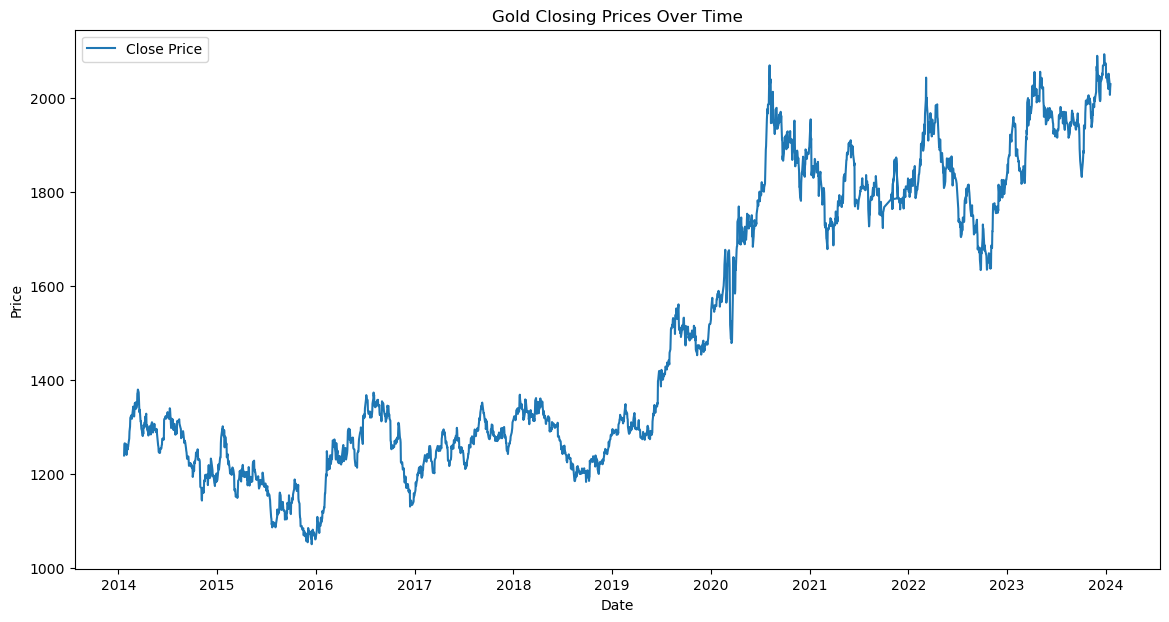

In [15]:
# Plot closing price over time
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Close'], label='Close Price')
plt.title('Gold Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [17]:
## Seasonality and Cyclicality
import seaborn as sns

# Decompose time series
from statsmodels.tsa.seasonal import seasonal_decompose

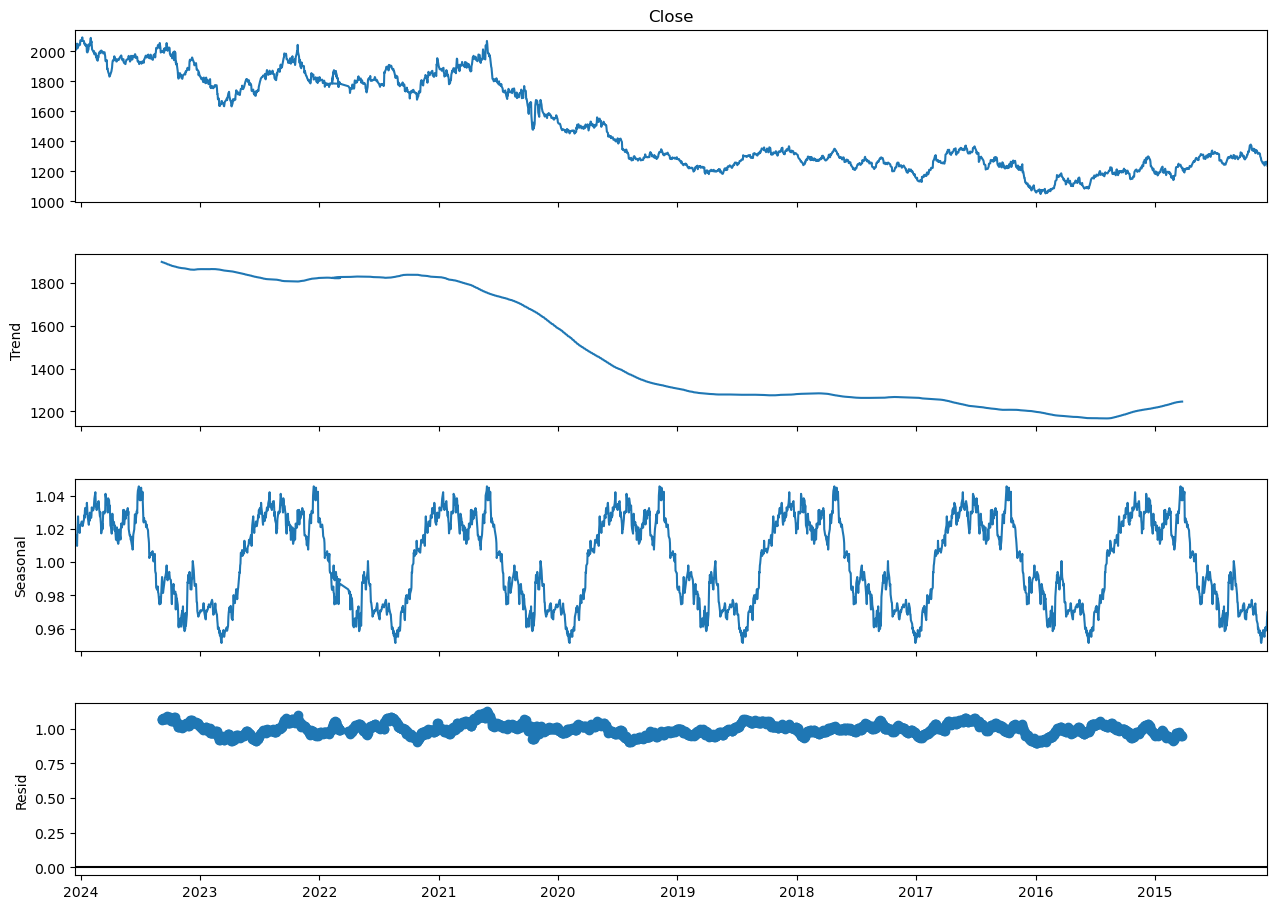

In [19]:
decomposition = seasonal_decompose(gold_data['Close'], model='multiplicative', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 10)
plt.show()

## Advanced Modeling

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

In [23]:
# Prepare the data
gold_data['Day'] = gold_data.index.dayofyear
X = gold_data[['Day']]
y = gold_data['Close']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# Train and evaluate different models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))

# Decision Tree
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)
dt_predictions = dt_model.predict(X_test_scaled)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))

# Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train_scaled, y_train)
rf_predictions = rf_model.predict(X_test_scaled)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))


In [31]:
# Compare model performances
print(f'Linear Regression RMSE: {lr_rmse}')
print(f'Decision Tree RMSE: {dt_rmse}')
print(f'Random Forest RMSE: {rf_rmse}')

Linear Regression RMSE: 372.1657791989963
Decision Tree RMSE: 383.8660671686287
Random Forest RMSE: 383.9945191676706


## Trading Strategy Development

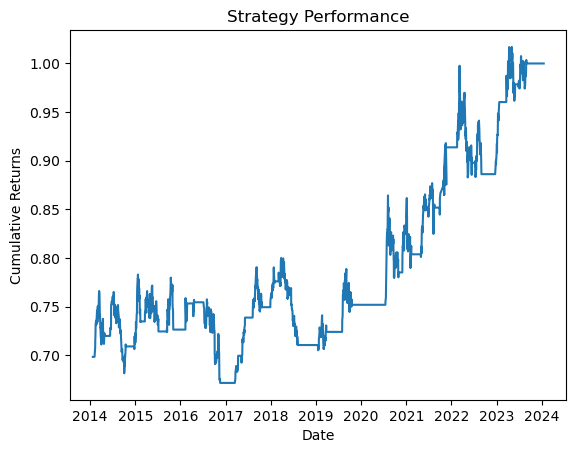

In [35]:
import numpy as np

# Calculate daily returns
gold_data['Return'] = gold_data['Close'].pct_change()

# Define a simple moving average crossover strategy
short_window = 20
long_window = 50

gold_data['Short_MA'] = gold_data['Close'].rolling(window=short_window).mean()
gold_data['Long_MA'] = gold_data['Close'].rolling(window=long_window).mean()

# Create a signal column
gold_data['Signal'] = np.where(gold_data['Short_MA'] > gold_data['Long_MA'], 1, 0)

# Backtest the strategy
gold_data['Strategy_Return'] = gold_data['Return'] * gold_data['Signal'].shift(1)

# Calculate the cumulative returns
cum_returns = (1 + gold_data['Strategy_Return']).cumprod()

# Plot the cumulative returns
plt.plot(cum_returns)
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Strategy Performance')
plt.show()

In [41]:
# Example: Simple Moving Average (SMA) Strategy
gold_data['SMA_50'] = gold_data['Close'].rolling(window=50).mean()
gold_data['SMA_200'] = gold_data['Close'].rolling(window=200).mean()

# Define trading signals
gold_data['Signal'] = 0
gold_data.iloc[50:, gold_data.columns.get_loc('Signal')] = np.where(
    gold_data.iloc[50:, gold_data.columns.get_loc('SMA_50')] > gold_data.iloc[50:, gold_data.columns.get_loc('SMA_200')], 1, -1
)

# Backtest the strategy
gold_data['Strategy_Returns'] = gold_data['Signal'].shift(1) * gold_data['Close'].pct_change()

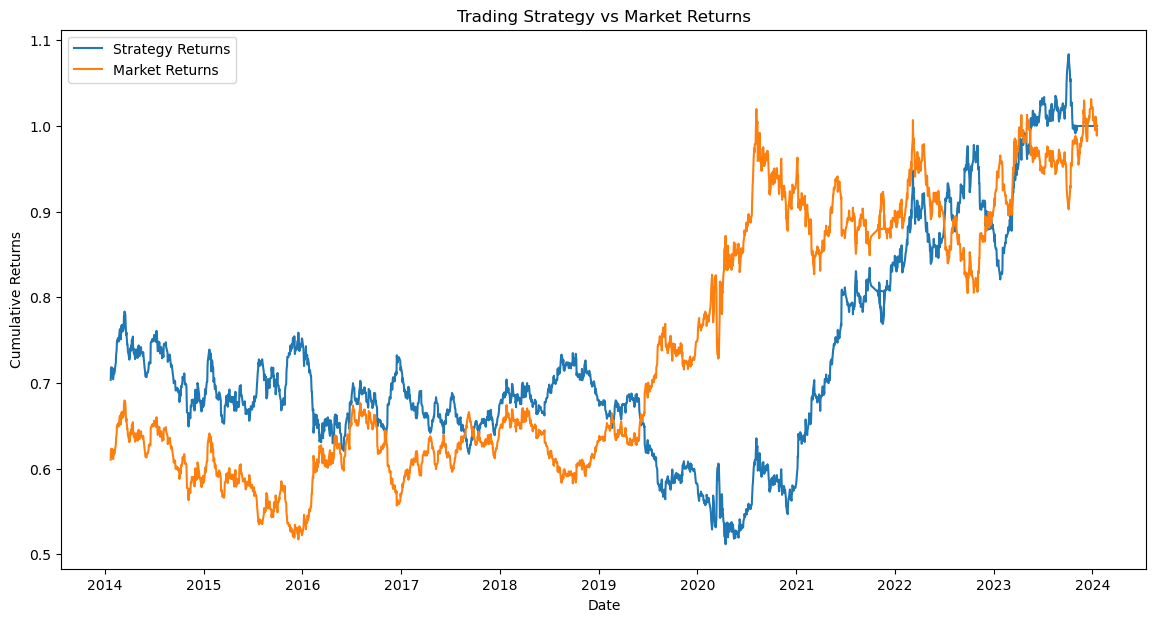

In [22]:
# Calculate cumulative returns
gold_data['Cumulative_Strategy_Returns'] = (1 + gold_data['Strategy_Returns']).cumprod()
gold_data['Cumulative_Market_Returns'] = (1 + gold_data['Close'].pct_change()).cumprod()

# Plot the returns
plt.figure(figsize=(14, 7))
plt.plot(gold_data['Cumulative_Strategy_Returns'], label='Strategy Returns')
plt.plot(gold_data['Cumulative_Market_Returns'], label='Market Returns')
plt.title('Trading Strategy vs Market Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

## Market Sentiment Analysis

In [9]:
# Convert Date column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Create a Year column from the Date column
gold_data['Year'] = gold_data['Date'].dt.year

# Display the first few rows to confirm changes
print(gold_data.head())

   Unnamed: 0       Date   Close    Volume    Open    High     Low  Year
0           0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2  2024
1           1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7  2024
2           2 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6  2024
3           3 2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6  2024
4           4 2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1  2024


In [23]:
# Create the event DataFrame with year and impact descriptors
event_data = pd.read_csv('gold_price_influences.csv')

# Convert the Date column to datetime format with dayfirst=True
event_data['Date'] = pd.to_datetime(event_data['Date'], dayfirst=True)

# Create a Year column in the event data
event_data['Year'] = event_data['Date'].dt.year

# Display the DataFrame
print(event_data)

# Confirm the data types of the columns
print(event_data.dtypes)

         Date            Events_Impact  Year
0  2014-01-23                Increased  2014
1  2014-12-23                Increased  2014
2  2015-05-30                Increased  2015
3  2015-09-10                Decreased  2015
4  2016-05-18                Increased  2016
5  2016-09-28                Increased  2016
6  2017-10-04                Increased  2017
7  2017-12-29       Temporary Increase  2017
8  2018-02-06                Increased  2018
9  2018-06-28                Increased  2018
10 2019-07-03                Increased  2019
11 2019-11-07                Increased  2019
12 2020-05-08  Significantly Increased  2020
13 2020-12-04                Increased  2020
14 2021-11-18                Increased  2021
15 2021-01-03                 Volatile  2021
16 2022-05-20                Increased  2022
17 2022-09-20                Increased  2022
18 2023-06-09                Increased  2023
19 2023-08-22                 Volatile  2023
20 2024-01-17                Increased  2024
21 2024-01

In [27]:
# Merge event data with gold prices on the Year column
gold_data_with_events = gold_data.merge(event_data[['Year', 'Events_Impact']], on='Year', how='left')

# Display the first few rows of the merged DataFrame
print(gold_data_with_events.head())

   Unnamed: 0       Date   Close    Volume    Open    High     Low  Year  \
0           0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2  2024   
1           0 2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2  2024   
2           1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7  2024   
3           1 2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7  2024   
4           2 2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6  2024   

  Events_Impact  
0     Increased  
1        Varied  
2     Increased  
3        Varied  
4     Increased  


No matching date for event: 2015-05-30 00:00:00
No matching date for event: 2021-01-03 00:00:00


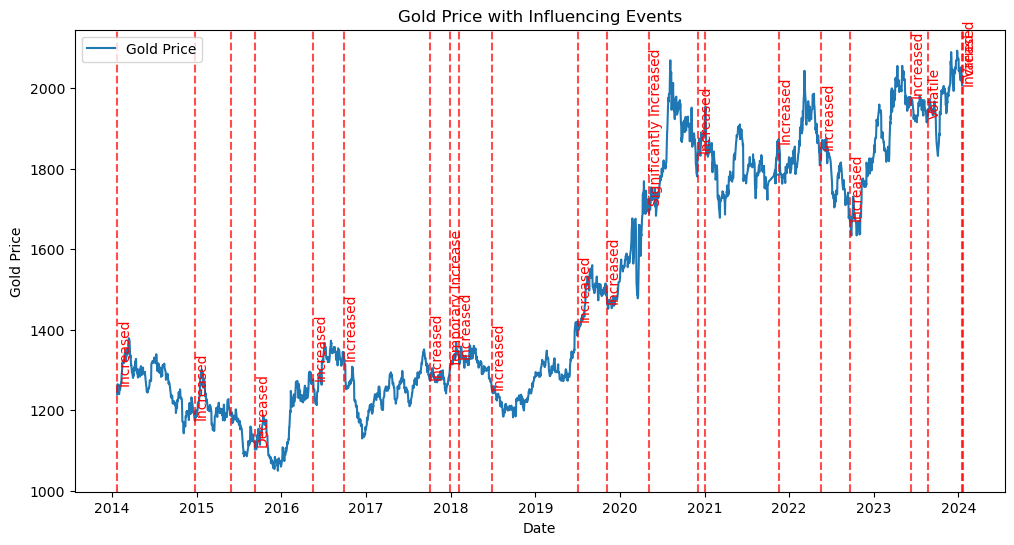

In [33]:
# Plot the impact of events on gold prices
import matplotlib.pyplot as plt
# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(gold_data_with_events['Date'], gold_data_with_events['Close'], label='Gold Price')

# Add vertical lines and text annotations for events
for event in event_data.itertuples():
    plt.axvline(event.Date, color='r', linestyle='--', alpha=0.7)
    # Find the corresponding gold price close value
    close_value = gold_data_with_events.loc[gold_data_with_events['Date'] == event.Date, 'Close']
    if not close_value.empty:
        plt.text(event.Date, 
                 close_value.values[0], 
                 event.Events_Impact, 
                 rotation=90, 
                 verticalalignment='bottom', 
                 color='red')
    else:
        print(f"No matching date for event: {event.Date}")

plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price with Influencing Events')
plt.legend()
plt.show()

## Statistical Analysis

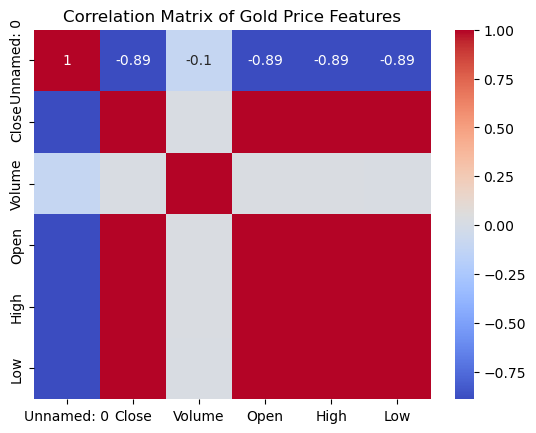

In [27]:
# Example: Correlation analysis with volume
correlation_matrix = gold_data.corr()
# Plot heatmap of correlations
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Gold Price Features')
plt.show()

In [39]:
import pandas as pd
import scipy.stats as stats

# Load the dataset
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1y-vlQJ08NWrKqeOC7v6H9kxSWJUNPyJ_Y3oxD7Nh064/export?format=csv')

# Perform a t-test to compare the mean closing prices between two time periods
period1 = df[df['Date'] < '2018-01-01']
period2 = df[df['Date'] >= '2018-01-01']

t_stat, p_val = stats.ttest_ind(period1['Close'], period2['Close'])
print(f'T-statistic: {t_stat:.2f}')
print(f'P-value: {p_val:.4f}')

T-statistic: -51.45
P-value: 0.0000
